<a href="https://colab.research.google.com/github/pedrobet/classes/blob/main/notebooks/stats_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")

In [5]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart


In [6]:
# Dimensões do data frame
houses.shape

(1744, 13)

## Definindo se um imóvel está à venda ou para locação a partir do preço

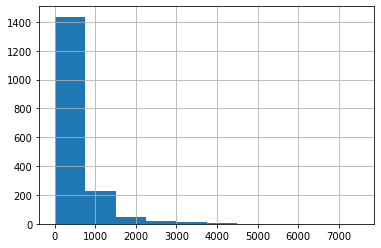

In [7]:
(houses['price']/1000).hist()

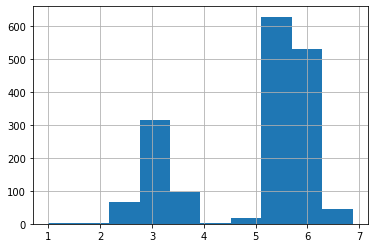

In [8]:
houses['log_price'] = houses['price'].apply(np.log10)
houses[houses['log_price'] > 0]['log_price'].hist()

In [9]:
# Adicionando coluna para aluguel e venda
houses['operation'] = 'sell'
houses.loc[(houses['price'] > 0) & (houses['price'] < 30000),'operation'] = 'rent'
houses = houses.drop(['log_price'], axis=1)
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,rent
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,sell
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,sell
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,sell
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,sell


In [10]:
houses.dtypes

price          int64
latitude     float64
longitude    float64
bedrooms     float64
area         float64
pkspaces     float64
bathrooms    float64
ensuites     float64
suburb        object
district      object
city          object
state         object
type          object
operation     object
dtype: object

## Estatísticas univariadas

Exercícios:

1. Calcule a média (mean), mediana (median), moda (mode), variância (var), desvio padrão (std) para preço e área de imóveis à venda.
2. Calucle o IQR da área e preço (dica: describe)
3. Calcule o preço médio do metro quadrado de venda e aluguel para Recife
5. Calcule o preço médio do metro quadrado de venda para apartamentos e casas
6. Calcule a área média de venda para apartamentos e casas
7. Encontre os bairros com maior e menor valor de venda do metro quadrado
8. Calcule a média e mediana de venda do metro quadrado por bairros (dica: usar groupby)
9. Calcule a média do metro quadrado em apartamentos de no máximo 3 quartos no bairro Espinheiro
10. Encontre os bairros com a menor e maior mediana de área

In [11]:
houses[houses['operation'] == 'sell']['price'].mean()

652416.6103059581

In [12]:
houses[houses['operation'] == 'sell']['price'].median()

470000.0

In [13]:
houses[houses['operation'] == 'sell']['price'].mode()

0    350000
dtype: int64

In [14]:
houses[houses['operation'] == 'sell']['price'].var()

371353283907.4838

In [15]:
houses[houses['operation'] == 'sell']['price'].std()

609387.6302547369

In [16]:
houses[houses['operation'] == 'sell']['price'].describe()

count    1.242000e+03
mean     6.524166e+05
std      6.093876e+05
min      0.000000e+00
25%      3.300000e+05
50%      4.700000e+05
75%      7.400000e+05
max      7.500000e+06
Name: price, dtype: float64

In [17]:
houses[houses['operation'] == 'sell']['area'].describe()

count    1220.000000
mean      128.066484
std       102.078742
min        25.000000
25%        72.000000
50%       100.000000
75%       149.000000
max      1682.000000
Name: area, dtype: float64

In [18]:
houses[houses['operation'] == 'sell']['area'].describe()[4]

72.0

In [19]:
#IQR da área
houses['area'].describe()[6] - houses['area'].describe()[4]

69.0

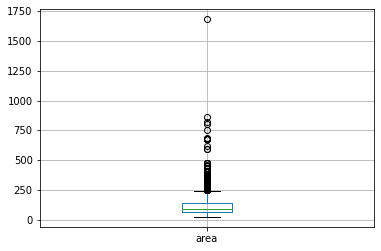

In [20]:
houses.boxplot(column=['area'])

In [21]:
houses['price_square_meter'] = houses['price']/houses['area']

In [22]:
houses[(houses.type == 'apart') & (houses.bedrooms <= 3) & (houses.suburb == 'Espinheiro') & (houses.operation == 'sell')].price_square_meter.mean()

4690.194171895575

In [23]:
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].mean()

suburb
Aflitos             5057.981293
Apipucos            4953.378876
Areias              2317.073171
Arruda              3599.960047
Boa Viagem          5930.295787
Boa Vista           4665.206061
Campo Grande        4648.761296
Casa Amarela        5351.374665
Casa Forte          6183.445243
CaxangÌÁ            4587.357285
Coelhos             4666.666667
Cohab               1933.333333
Cordeiro            4083.564554
Derby               9043.387168
Encruzilhada        5052.220649
Engenho do Meio     9641.890805
Espinheiro          5231.928476
FundÌ£o             3920.280333
GraÌ¤as             4587.853776
HipÌ_dromo          2502.343750
Ibura               5990.463333
Ilha do Retiro      6055.816062
Imbiribeira         9902.509394
Ipsep               2777.982481
Iputinga            1770.728716
Jaqueira            6742.418062
Madalena            5794.175868
Mangabeira          4138.295095
Monteiro            6544.807869
Parnamirim          5511.663726
Pau-Ferro           2395.826190
P

In [24]:
houses[houses['operation']=='sell'].groupby(['suburb']).agg(['mean','median'])['price_square_meter']

,mean,median
suburb,,
Aflitos,5057.981293,4897.959184
Apipucos,4953.378876,4317.180617
Areias,2317.073171,2317.073171
Arruda,3599.960047,4000.000000
Boa Viagem,5930.295787,5351.562500
Boa Vista,4665.206061,5388.986014
Campo Grande,4648.761296,4130.434783
Casa Amarela,5351.374665,5806.451613
Casa Forte,6183.445243,6272.727273


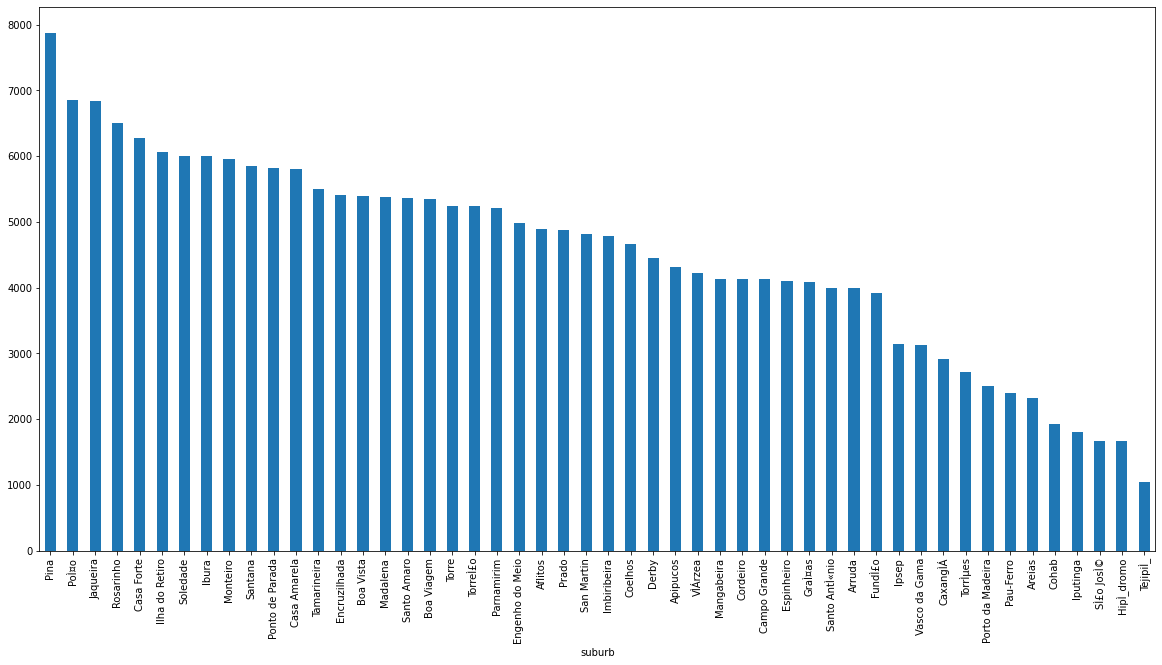

In [25]:
# Medianas do valor de venda por metro quadrado para cada bairro
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].median().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [26]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')].describe()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_square_meter
count,1.300000e+01,13.000000,13.000000,13.000000,13.000000,10.000000,11.000000,7.0,13.000000
mean,1.193943e+06,-8.055494,-34.893257,3.230769,213.623846,1.700000,3.090909,1.0,9607.917369
std,1.868665e+06,0.000952,0.002665,1.012739,442.405253,0.823273,0.301511,0.0,14132.119159
min,2.500000e+05,-8.056280,-34.895347,1.000000,40.110000,0.000000,3.000000,1.0,1948.694030
25%,3.650000e+05,-8.055979,-34.895347,3.000000,51.000000,1.250000,3.000000,1.0,5391.304348
50%,6.200000e+05,-8.055979,-34.895347,3.000000,115.000000,2.000000,3.000000,1.0,6000.000000
75%,6.900000e+05,-8.054936,-34.890077,4.000000,115.000000,2.000000,3.000000,1.0,6606.831214
max,7.000000e+06,-8.052734,-34.889466,5.000000,1682.000000,3.000000,4.000000,1.0,56039.215686


In [27]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,operation,price_square_meter
179,365000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,sell,7156.862745
182,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,6000.000000
231,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,5391.304348
400,2858000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,sell,56039.215686
476,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,5391.304348
618,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,6000.000000
628,592139,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,sell,11610.568627
752,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,6000.000000
788,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,5391.304348
862,261125,-8.055979,-34.895347,4.0,134.00,3.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,sell,1948.694030


## Estatísticas bivariadas

In [28]:
houses[houses.operation=='sell'].cov()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_square_meter
price,3.713533e+11,-2171.657900,-425.307071,301614.579684,4.207143e+07,332370.180148,411998.187635,325102.123490,1.089569e+09
latitude,-2.171658e+03,0.000992,-0.000045,-0.003230,-1.293944e-01,-0.001840,0.003016,-0.000310,-8.937359e+00
longitude,-4.253071e+02,-0.000045,0.000233,-0.001055,-1.443103e-01,-0.002335,-0.001252,-0.002352,8.909269e-01
bedrooms,3.016146e+05,-0.003230,-0.001055,1.092577,5.815163e+01,0.679856,0.757604,0.419521,7.175439e+01
area,4.207143e+07,-0.129394,-0.144310,58.151630,1.042007e+04,59.909799,74.235459,58.567118,-4.020638e+04
pkspaces,3.323702e+05,-0.001840,-0.002335,0.679856,5.990980e+01,1.027633,0.740625,0.573380,3.073067e+02
bathrooms,4.119982e+05,0.003016,-0.001252,0.757604,7.423546e+01,0.740625,1.470918,0.878985,2.435710e+02
ensuites,3.251021e+05,-0.000310,-0.002352,0.419521,5.856712e+01,0.573380,0.878985,0.859048,2.376223e+02
price_square_meter,1.089569e+09,-8.937359,0.890927,71.754388,-4.020638e+04,307.306746,243.571006,237.622300,1.297808e+07


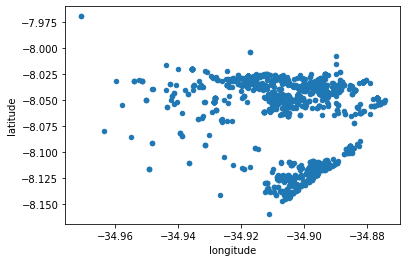

In [29]:
houses.plot.scatter(x='longitude',y='latitude')

In [30]:
houses[houses.operation=='sell'].corr(method='pearson')

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_square_meter
price,1.000000,-0.113166,-0.045734,0.473514,0.677350,0.575893,0.542489,0.679669,0.497062
latitude,-0.113166,1.000000,-0.094013,-0.098142,-0.040105,-0.060521,0.079602,-0.015053,-0.078492
longitude,-0.045734,-0.094013,1.000000,-0.066159,-0.092344,-0.153498,-0.066682,-0.165846,0.016154
bedrooms,0.473514,-0.098142,-0.066159,1.000000,0.561188,0.656571,0.664399,0.562102,0.019621
area,0.677350,-0.040105,-0.092344,0.561188,1.000000,0.574699,0.605221,0.669119,-0.109334
pkspaces,0.575893,-0.060521,-0.153498,0.656571,0.574699,1.000000,0.631790,0.649819,0.128638
bathrooms,0.542489,0.079602,-0.066682,0.664399,0.605221,0.631790,1.000000,0.850007,0.052967
ensuites,0.679669,-0.015053,-0.165846,0.562102,0.669119,0.649819,0.850007,1.000000,0.095140
price_square_meter,0.497062,-0.078492,0.016154,0.019621,-0.109334,0.128638,0.052967,0.095140,1.000000


In [31]:
houses[houses.operation=='sell'].corr(method='spearman')

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,price_square_meter
price,1.000000,-0.066591,-0.069280,0.639660,0.723069,0.713786,0.656935,0.718041,0.443111
latitude,-0.066591,1.000000,-0.205969,-0.134175,-0.070345,-0.085252,0.030275,0.070180,0.022080
longitude,-0.069280,-0.205969,1.000000,-0.049529,-0.093217,-0.138025,-0.049273,-0.177310,-0.062570
bedrooms,0.639660,-0.134175,-0.049529,1.000000,0.736587,0.694278,0.701999,0.634320,-0.064802
area,0.723069,-0.070345,-0.093217,0.736587,1.000000,0.701702,0.678649,0.658985,-0.188167
pkspaces,0.713786,-0.085252,-0.138025,0.694278,0.701702,1.000000,0.590699,0.626918,0.140522
bathrooms,0.656935,0.030275,-0.049273,0.701999,0.678649,0.590699,1.000000,0.803017,0.074260
ensuites,0.718041,0.070180,-0.177310,0.634320,0.658985,0.626918,0.803017,1.000000,0.203648
price_square_meter,0.443111,0.022080,-0.062570,-0.064802,-0.188167,0.140522,0.074260,0.203648,1.000000


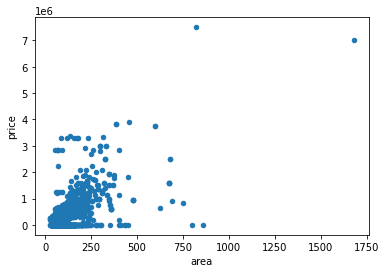

In [32]:
houses.plot.scatter(x='area',y='price')

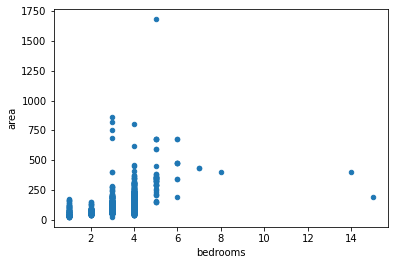

In [33]:
houses.plot.scatter(x='bedrooms',y='area')